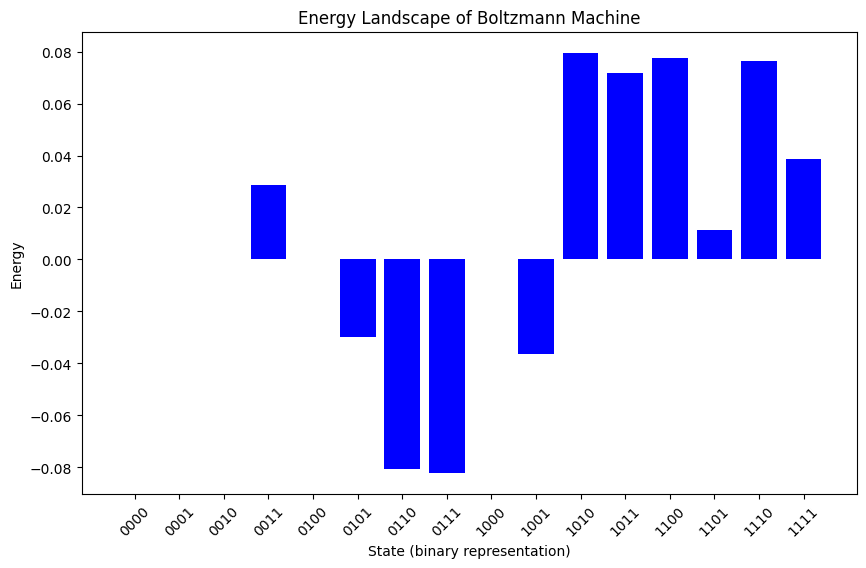

In [1]:
import matplotlib.pyplot as plt
import numpy as np

class BoltzmannMachine:
  def __init__(self, n_units):
    self.n_units = n_units
    self.weights = np.random.randn(n_units, n_units)*0.1
    np.fill_diagonal(self.weights, 0)

  def energy(self, state):
    return -0.5 * np.dot(state, np.dot(self.weights, state))

  def sample(self, state):
    for i in range(self.n_units):
      activation = np.dot(self.weights[i],state)
      prob = 1 / (1+np.exp(-activation))
      state[i] = 1 if np.random.rand() < prob else 0
    return state

n_units = 4
bm = BoltzmannMachine(n_units)

states = np.array([np.array([int(x) for x in f"{i:04b}"]) for i in range(2**n_units)])
energies = np.array([bm.energy(state) for state in states])

plt.figure(figsize=(10,6))
plt.bar(range(len(energies)), energies,color='blue')
plt.xlabel("State (binary representation)")
plt.ylabel("Energy")
plt.title("Energy Landscape of Boltzmann Machine")
plt.xticks(range(len(states)),["".join(map (str,s)) for s in states],rotation=45)
plt.show()